# Keras tutorial
This tutorial is a modification from https://elitedatascience.com/keras-tutorial-deep-learning-in-python

In [1]:
import numpy as np
from keras.models import Sequential # linear stack of neural network layers
from keras.layers import Dense, Dropout, Activation, Flatten # layers to use
from keras.layers import Convolution2D, MaxPooling2D # CNN layers
from keras.utils import np_utils
from keras.utils import to_categorical
%load_ext autotime

C:\Users\oscar\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


## Loading Data

Loading MURA images

In [2]:
import utils # importing from our utils functions

time: 5.56 s


In [3]:
x_train, y_train, x_test, y_test = utils.read_mura_pickle()

INFO:utils.utils:loading data/MURA-v1.1/x_train.pkl
INFO:utils.utils:loading data/MURA-v1.1/y_train.pkl
INFO:utils.utils:loading data/MURA-v1.1/x_valid.pkl
INFO:utils.utils:loading data/MURA-v1.1/y_valid.pkl


time: 699 ms


We can look at the shape of the dataset:

In [4]:
x_train.shape

(36808, 128, 128)

time: 4 ms


Visually inspect an image:

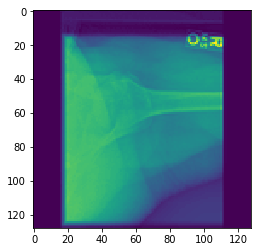

time: 140 ms


In [5]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(x_train[0])

## Data preparation

reshape the data from $128\times128$ to $128\times128\times1$ (1 for channel)

In [6]:
x_train = x_train.reshape(x_train.shape[0], 128, 128, 1)
x_test = x_test.reshape(x_test.shape[0], 128, 128, 1)

time: 2 ms


In [7]:
x_train.shape

(36808, 128, 128, 1)

time: 2 ms


Convert our data type to float32 and normalize our data values to the range [0, 1].

In [8]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

time: 1.62 s


We have a 0-1 target so it's naturally one-hot coded, just need to reshape it to have one column

In [10]:
y_train = y_train.reshape(y_train.shape[0], 1)

time: 1 ms


In [11]:
y_train.shape

(36808, 1)

time: 2 ms


## Define model architecture

In [12]:
# declare sequential model
model = Sequential() 

time: 2 ms


In [13]:
# CNN input layer 
# the defaults for strides is (1,1) but it's always good to be explicit
model.add(Convolution2D(filters=32, kernel_size=(3, 3), strides=(1,1), activation='relu', input_shape=(128, 128, 1)))

time: 22 ms


We can check the shape of our model output after adding this layer

In [14]:
model.output_shape

(None, 126, 126, 32)

time: 1.99 ms


And we can just keep adding layers like we are building legos

In [15]:
model.add(Convolution2D(filters=32, kernel_size=(3, 3), strides=(1,1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

time: 42 ms


MaxPooling2D is a way to reduce the number of parameters in our model by sliding a 2x2 pooling filter across the previous layer and taking the max of the 4 values in the 2x2 filter.

Dropout is used to prevent overfitting - read more about it [here](https://www.quora.com/How-does-the-dropout-method-work-in-deep-learning-And-why-is-it-claimed-to-be-an-effective-trick-to-improve-your-network)

In [16]:
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

time: 52.2 ms


## Compile model

We still need to define the loss and optimization method. Keras has a variety of [loss functions](https://keras.io/losses/) and out-of-the-box [optimizers](https://keras.io/optimizers/) to choose from. For this tutorial we'll use cross-entropy as loss function and [Adam](https://arxiv.org/abs/1412.6980) as our optimizer.

In [17]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

time: 40 ms


## Fitting the model

In [18]:
model.fit(x_train, y_train, 
          batch_size=8, nb_epoch=10, verbose=1)

C:\Users\oscar\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Epoch 1/10
36808/36808 [==============================] - 254s 7ms/step - loss: 0.6677 - acc: 0.6000
Epoch 2/10
36808/36808 [==============================] - 251s 7ms/step - loss: 0.6535 - acc: 0.6160
Epoch 3/10
36808/36808 [==============================] - 251s 7ms/step - loss: 0.6378 - acc: 0.6335
Epoch 4/10
36808/36808 [==============================] - 251s 7ms/step - loss: 0.6124 - acc: 0.6610
Epoch 5/10
36808/36808 [==============================] - 251s 7ms/step - loss: 0.5717 - acc: 0.6969
Epoch 6/10
36808/36808 [==============================] - 250s 7ms/step - loss: 0.5247 - acc: 0.7322
Epoch 7/10
36808/36808 [==============================] - 253s 7ms/step - loss: 0.4737 - acc: 0.7667
Epoch 8/10
36808/36808 [==============================] - 253s 7ms/step - loss: 0.4214 - acc: 0.7983 1s - l
Epoch 9/10
36808/36808 [==============================] - 252s 7ms/step - loss: 0.3825 - acc: 0.8213
Epoch 10/10
36808/36808 [==============================] - 251s 7ms/step - loss: 0.3

time: 41min 55s


We can check how loss and accuracy change over epochs

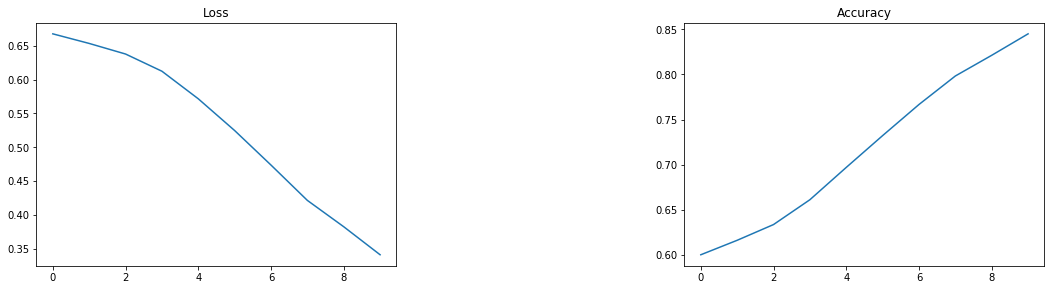

time: 182 ms


In [29]:
plt.figure(figsize=(20,5))
plt.subplot(121)
plt.plot(model.history.history['loss'])
plt.title('Loss')
plt.subplot(122)
plt.plot(model.history.history['acc'])
plt.title('Accuracy')
plt.subplots_adjust(left=0.2, wspace=0.8, top=0.8)
plt.show()

## Evaluating our model on the test set

In [30]:
y_test = y_test.reshape(y_test.shape[0], 1)

time: 1 ms


### Loss and Accuracy

In [31]:
score = model.evaluate(x_test, y_test, verbose=0)

time: 2.15 s


In [32]:
score

[1.1643396376407553, 0.5808570535249326]

time: 2.97 ms


In [ ]:
# compute predicted y
y_test_hat = model.predict(x_test)


In [25]:
y_test.shape


(3197,)

time: 1.97 ms


In [23]:
# get actual digit labels
true_label = np.argmax(y_test, axis=1)
pred_label = np.argmax(y_test_hat, axis=1)

AxisError: axis 1 is out of bounds for array of dimension 1

time: 93 ms


### Cohen's Kappa

In [43]:
p_observed = (true_label == pred_label).sum()/true_label.shape[0]
p_expected = sum([(true_label == i).sum() * (pred_label == i).sum() / (true_label.shape[0] ** 2) for i in range(10)])

NameError: name 'true_label' is not defined

time: 15.6 ms


In [44]:
kappa = (p_observed - p_expected) / (1 - p_expected)

NameError: name 'p_observed' is not defined

time: 15.5 ms


In [45]:
kappa

NameError: name 'kappa' is not defined

time: 9.19 ms
